# Testing and running the SCF solver

In [ ]:
import sys
sys.path.append('/home/ngoel/programs/vampyr/build/lib/python3.13/site-packages')
import numpy as np
from vampyr import vampyr3d as vp
import system
import kain

precision = 1e-4
threshold = precision * 10

mra = system.initMRA(nBoxes=2, scaling = 1.0, scale = -4, order = 8)
# Water 1
atom1 = system.Atom(coords = (3.03640321, -0.125273197, 0.165537034), charge = 8)
atom2 = system.Atom(coords = (1.20775692, 0.126394035, 0.040864271), charge = 1)
atom3 = system.Atom(coords = (3.7449532, 1.653846757, 0.068992382), charge = 1)
# molecule = system.Molecule(atoms = [atom1, atom2, atom3], path="../../water_4/")

# Water 2
atom4 = system.Atom(coords = (-2.236881593, 0.079767042, -0.135775327), charge = 8)
atom5 = system.Atom(coords = (-2.80936204, -0.932460622, -1.444139354), charge = 1)
atom6 = system.Atom(coords = (-2.942869717, -0.602274003, 1.504521009), charge = 1)
# molecule = system.Molecule(atoms = [atom1, atom2, atom3, atom4, atom5, atom6], path="./../../diwater_5/")
he1 = system.Atom(coords = (0.0, 0.0, -1.5), charge = 2)
# he2 = Atom(coords = (0.0, 0.0, 1.5), charge = 2)
molecule = system.Molecule(atoms = [he1], path = "../../heA_4/")

scf = kain.SCF(molecule, mra, precision)
Phi, energies, updates = scf.runSCF(threshold = threshold, maxIter = 100, kain_start = 0, kain_history = 5)
print(updates)

# Testing and Running the embedding implementation

Setting up isolated SCF calculations for subsystems A and B
Running isolated SCF for subsystem A
=============Iteration: 0
0  |  E_tot: -84.89201634346921  |  E_HF: -76.05804887111739  |  dPhi: 0.03205693977750897
E_orb: -47.35978686505641  |  E_en: -122.88980530158456  |  E_el: 37.532229478412795  |  E_kin: 0.46555947970255573
=============Iteration: 1
1  |  E_tot: -84.89453333773093  |  E_HF: -76.06056586537912  |  dPhi: 0.009711751546814126
E_orb: -47.3454501294382  |  E_en: -123.13400239340878  |  E_el: 37.54908320829273  |  E_kin: 0.6903858473851159
=============Iteration: 2
2  |  E_tot: -84.89482575323241  |  E_HF: -76.0608582808806  |  dPhi: 0.0043426295360993305
E_orb: -47.371269415099974  |  E_en: -123.22194447115078  |  E_el: 37.52355633813244  |  E_kin: 0.8035623797859301
=============Iteration: 3
3  |  E_tot: -84.89488359517583  |  E_HF: -76.06091612282401  |  dPhi: 0.00387457126809599
E_orb: -47.37174715792366  |  E_en: -123.2323958579084  |  E_el: 37.52313643725216  |  E_

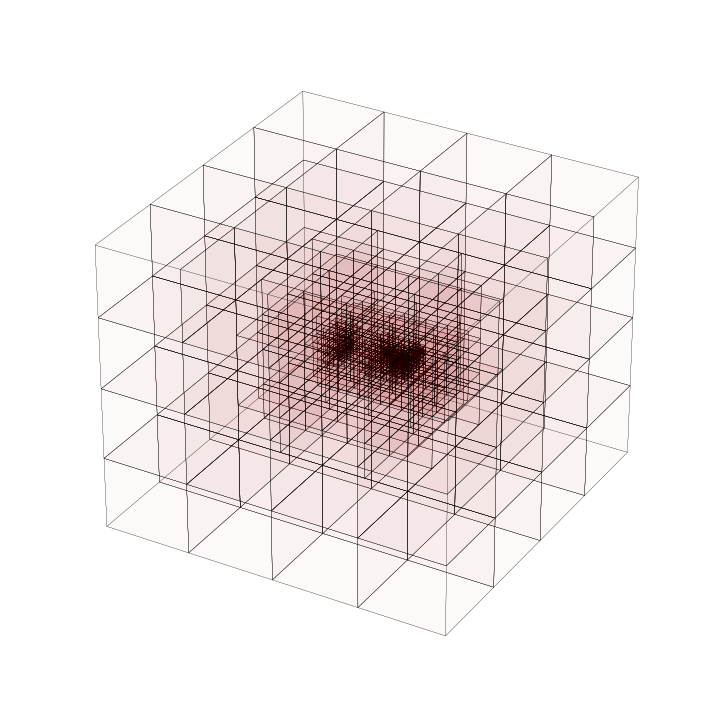

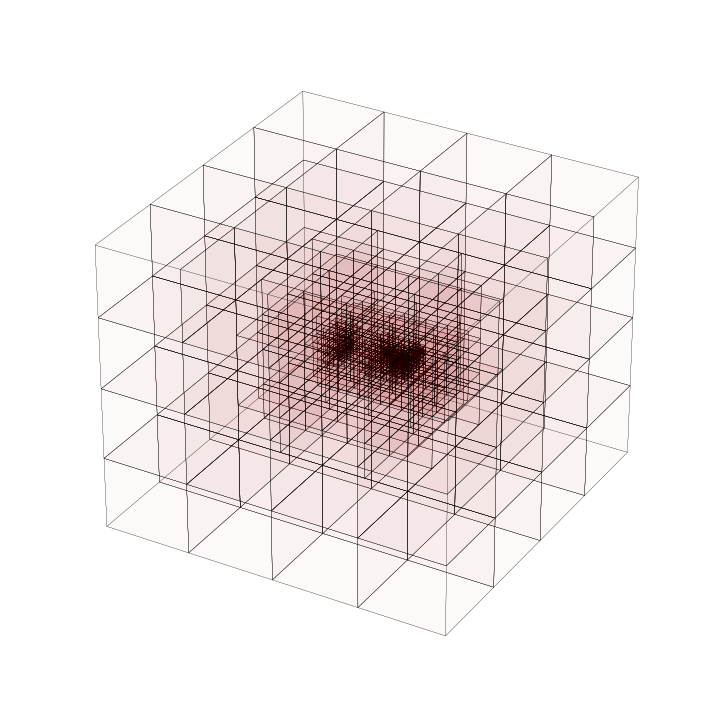

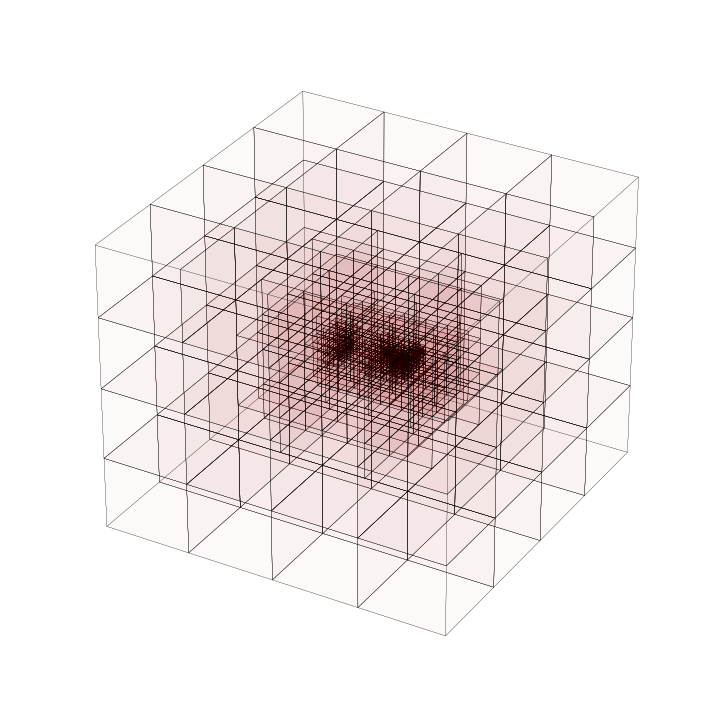

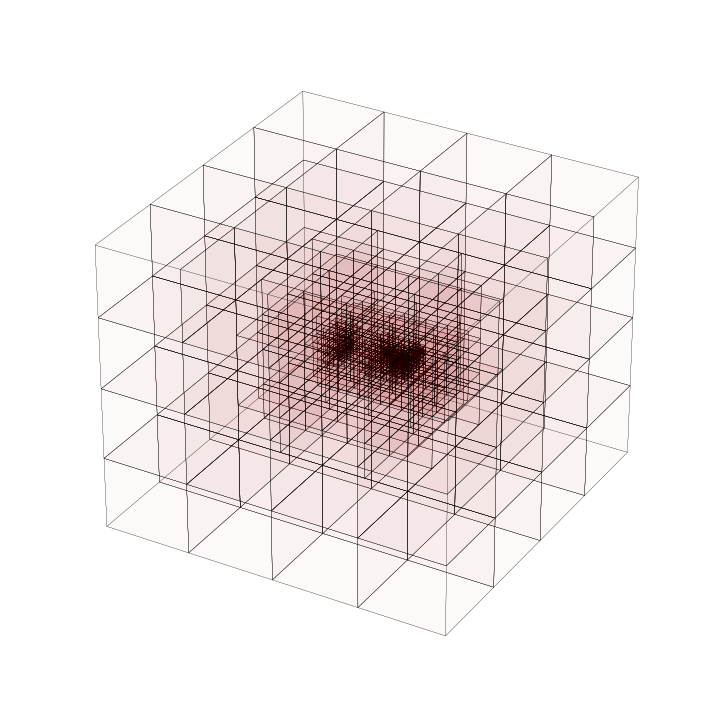

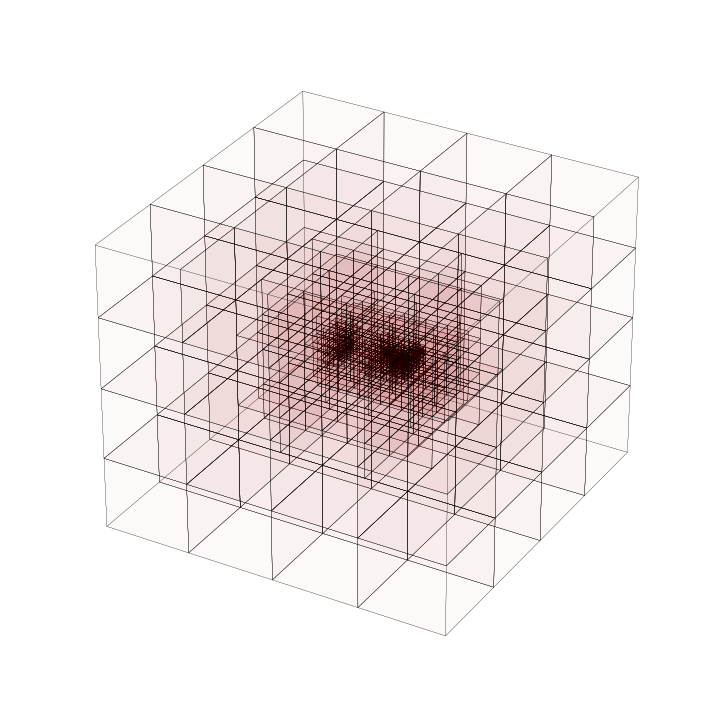

In [1]:
import sys
sys.path.append('/home/ngoel/programs/vampyr/build/lib/python3.13/site-packages')
import numpy as np
from vampyr import vampyr3d as vp
import system
import fde
import plot
from vampyr import plotter
import matplotlib.pyplot as plt

precision = 1e-4
threshold = precision * 10

mra = system.initMRA(nBoxes=2, scaling = 1.0, scale = -4, order = 8)
# Water 1
atom1 = system.Atom(coords = (3.03640321, -0.125273197, 0.165537034), charge = 8)
atom2 = system.Atom(coords = (1.20775692, 0.126394035, 0.040864271), charge = 1)
atom3 = system.Atom(coords = (3.7449532, 1.653846757, 0.068992382), charge = 1)
moleculeA = system.Molecule(atoms = [atom1, atom2, atom3], path="../../waterA_4/")

# Water 2
atom4 = system.Atom(coords = (-2.236881593, 0.079767042, -0.135775327), charge = 8)
atom5 = system.Atom(coords = (-2.80936204, -0.932460622, -1.444139354), charge = 1)
atom6 = system.Atom(coords = (-2.942869717, -0.602274003, 1.504521009), charge = 1)
moleculeB = system.Molecule(atoms = [atom4, atom5, atom6], path="../../waterB_4/")
# he1 = system.Atom(coords = (0.0, 0.0, -1.5), charge = 2)
# he2 = system.Atom(coords = (0.0, 0.0, 1.5), charge = 2)
# moleculeA = system.Molecule(atoms = [he1], path = "../../heA_4/")
# moleculeB = system.Molecule(atoms = [he2], path = "../../heB_4/")

scf = fde.FDE(moleculeA, moleculeB, mra, precision)
Phi, energies, updates = scf.runFDE(threshold = threshold, maxIter = 100, kain_start = 0, kain_history = 3)
print(updates)

rho = Phi[0][-1]**2
for i in range(1, len(Phi)):
    rho += Phi[i][-1]**2

cubePlotter = plot.Plotter([-8, -8, -8], [16, 0, 0], [0, 16, 0], [0, 0, 16], 100, 100, 100, moleculeA, moleculeB)
for i in range(len(Phi)):
    plotter.grid_plotter(Phi[i][-1])
    plt.show()
    cubePlotter.cubePlot(Phi[i][-1], "../../plots/orbital_{}.cube".format(i))
cubePlotter.cubePlot(rho, "../../plots/density.cube")


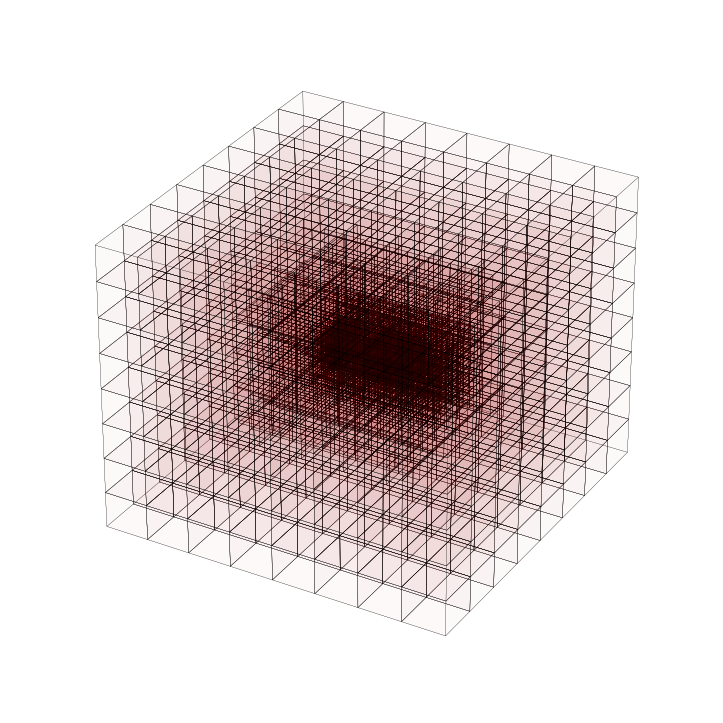

In [ ]:
rho = Phi[0][-1]**2
for i in range(1, len(Phi)):
    rho += Phi[i][-1]**2

plotter.grid_plotter(rho)
plt.show()